# Lab 7 and 8 - HERA *The final showdown*
#### Aidan Berres
#### Physics 434
#### 12/13/20

In [2]:
from pyuvdata import UVData
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

In [3]:
uv = UVData()
uv.read('hera1.hd5',file_type='uvh5')
p=uv.get_antpairs()
freqs = uv.freq_array[0]*1e-6

In [4]:
bl1=p[506]
d1 = uv.get_data(bl1)
d1.shape

(20, 1536)

## Waterfall plots

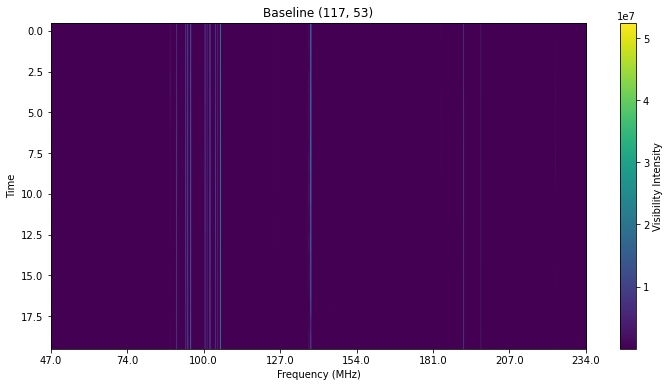

In [5]:
fig, axs = plt.subplots(1,1,figsize=(12,6))
im = plt.imshow(np.abs(d1),aspect='auto')
cbar = fig.colorbar(im,label='Visibility Intensity')
freqs = uv.freq_array[0]*1e-6 #gets frequencies associated with each channel, in MHz
axs.set_ylabel('Time')
axs.set_xlabel('Frequency (MHz)')
xticks = [int(i) for i in np.linspace(0,len(freqs)-1,8)]
_ = axs.set_xticks(xticks)
xticklabels = np.around(freqs[xticks],0)
_ = axs.set_xticklabels(xticklabels)
plt.title(f'Baseline {bl1}')
plt.show()

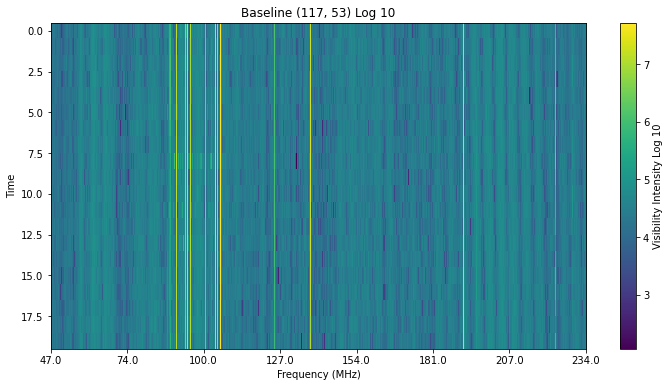

In [6]:
fig, axs = plt.subplots(1,1,figsize=(12,6))
im = plt.imshow(np.log10(np.abs(d1)),aspect='auto',interpolation='nearest')
cbar = fig.colorbar(im,label='Visibility Intensity Log 10')
freqs = uv.freq_array[0]*1e-6 #gets frequencies associated with each channel, in MHz
axs.set_ylabel('Time')
axs.set_xlabel('Frequency (MHz)')
xticks = [int(i) for i in np.linspace(0,len(freqs)-1,8)]
_ = axs.set_xticks(xticks)
xticklabels = np.around(freqs[xticks],0)
_ = axs.set_xticklabels(xticklabels)
plt.title(f'Baseline {bl1} Log 10')
plt.show()

## Feature Exploration
Using the Radio Frequency Spectrum Allocation Chart for South Africa, found [here](https://www.ee.co.za/wp-content/uploads/2015/03/csir-035-02-2015_.jpg),
![Image](https://www.ee.co.za/wp-content/uploads/2015/03/csir-035-02-2015_.jpg)

We can see that these bright signals between 87.5 MHz and 108.0 MHz are most likely Broadcasting signals

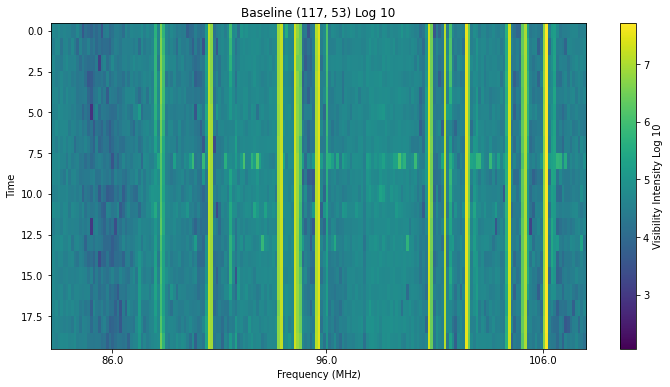

In [7]:
fig, axs = plt.subplots(1,1,figsize=(12,6))
im = plt.imshow(np.log10(np.abs(d1)),aspect='auto',interpolation='nearest')
cbar = fig.colorbar(im,label='Visibility Intensity Log 10')
freqs = uv.freq_array[0]*1e-6 #gets frequencies associated with each channel, in MHz
axs.set_ylabel('Time')
axs.set_xlabel('Frequency (MHz)')
xticks = [int(i) for i in np.linspace(0,len(freqs)-1,20)]
_ = axs.set_xticks(xticks)
xticklabels = np.around(freqs[xticks],0)
_ = axs.set_xticklabels(xticklabels)
plt.title(f'Baseline {bl1} Log 10')
plt.xlim(300,500)
plt.show()

## Signal removal

In [8]:
def rm_bkg(bl):
    sr1 = []
    for i in range(19):
        sr1.append(bl[i+1]-bl[i])
    sr1=np.array(sr1)
    return sr1

In [9]:
sr1=rm_bkg(d1)

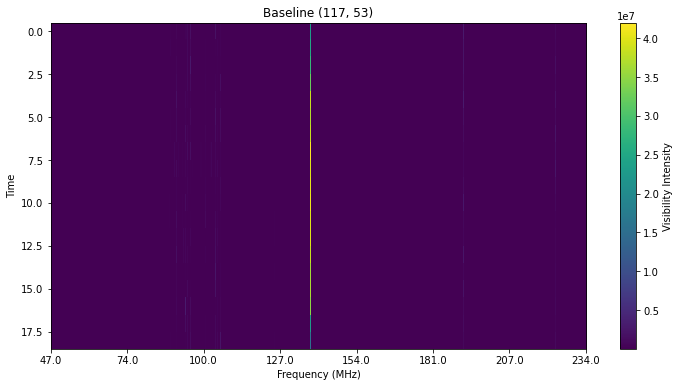

In [10]:
fig, axs = plt.subplots(1,1,figsize=(12,6))
im = plt.imshow(np.abs(sr1),aspect='auto',interpolation='nearest')
cbar = fig.colorbar(im,label='Visibility Intensity')
freqs = uv.freq_array[0]*1e-6 #gets frequencies associated with each channel, in MHz
axs.set_ylabel('Time')
axs.set_xlabel('Frequency (MHz)')
xticks = [int(i) for i in np.linspace(0,len(freqs)-1,8)]
_ = axs.set_xticks(xticks)
xticklabels = np.around(freqs[xticks],0)
_ = axs.set_xticklabels(xticklabels)
plt.title(f'Baseline {bl1}')
plt.show()

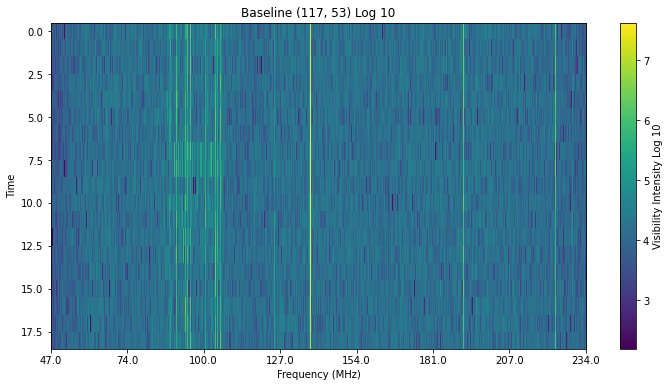

In [11]:
fig, axs = plt.subplots(1,1,figsize=(12,6))
im = plt.imshow(np.log10(np.abs(sr1)),aspect='auto',interpolation='nearest')
cbar = fig.colorbar(im,label='Visibility Intensity Log 10')
freqs = uv.freq_array[0]*1e-6 #gets frequencies associated with each channel, in MHz
axs.set_ylabel('Time')
axs.set_xlabel('Frequency (MHz)')
xticks = [int(i) for i in np.linspace(0,len(freqs)-1,8)]
_ = axs.set_xticks(xticks)
xticklabels = np.around(freqs[xticks],0)
_ = axs.set_xticklabels(xticklabels)
plt.title(f'Baseline {bl1} Log 10')
plt.show()

In [13]:
bt1 = []
for i in range(19):
    bt1.append(abs(sr1[i]))
bt1 = np.array(bt1)
dav1=bt1.mean(axis=0)
dav1.shape

(1536,)

In [19]:
dav1=np.mean(abs(sr1),axis=0)

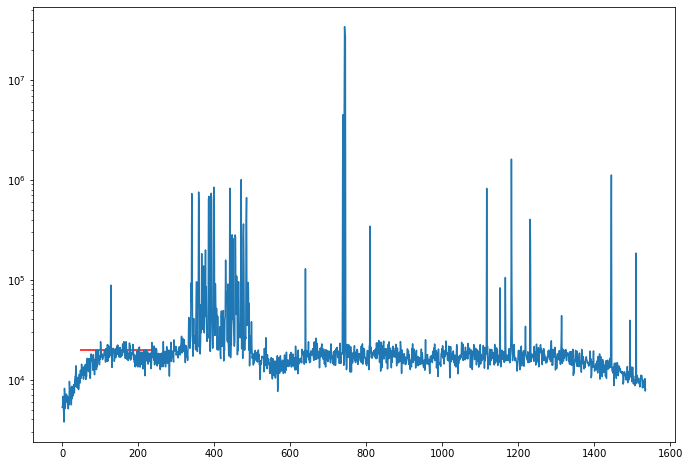

In [90]:
plt.subplots(figsize=(11.5,8))

plt.plot(np.arange(len(dav1)),dav1)
plt.yscale('log')
plt.hlines(2e4,freqs[0],freqs[-1],color='red')
#plt.xlim(100,180)

667.0


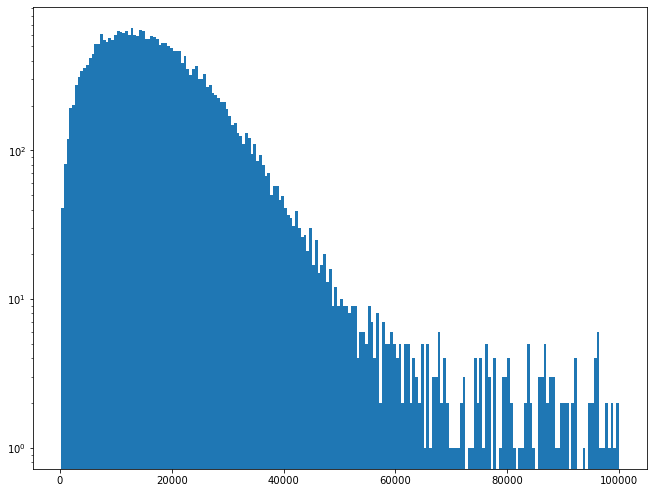

In [124]:
plt.subplots(figsize=(11,8.5))
sr1f=np.abs(sr1).flatten()
#vro1=sr1f[200:1400]
vro1 = sr1f[sr1f < 1e5]
plt.yscale('log')
n=plt.hist(vro1,bins=200);
print(n[0].max())

518.0


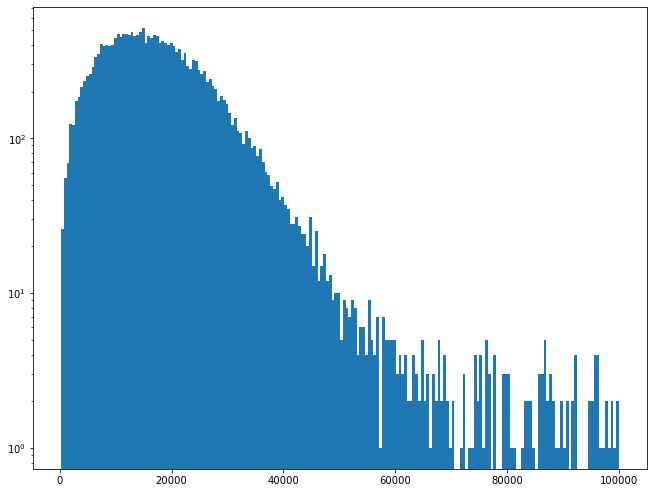

In [158]:
plt.subplots(figsize=(11,8.5))
sr1f=np.abs(sr1[:,200:1400]).flatten()
vro1=sr1f
vro1 = vro1[vro1 < 1e5]
plt.yscale('log')
n=plt.hist(vro1,bins=200);
print(n[0].max())

In [122]:
sr1[::].shape

(19, 1536)

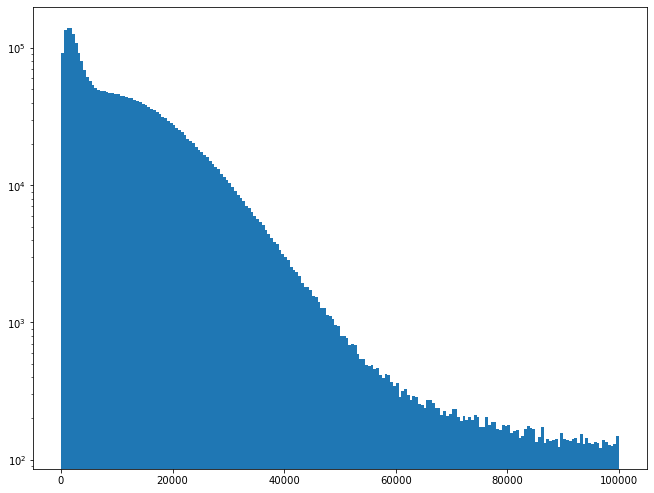

In [88]:
bt=[]
for j in range(len(rns)):
        d = rm_bkg(uv.get_data(rns[j]))
        bt.append(d)
plt.subplots(figsize=(11,8.5))
bt1=np.array(bt)
bt1f=np.abs(bt1).flatten()

vro2 = bt1f[bt1f < 1e5]
plt.yscale('log')
#plt.hist(bt1f,bins=200);
plt.hist(vro2,bins=200);

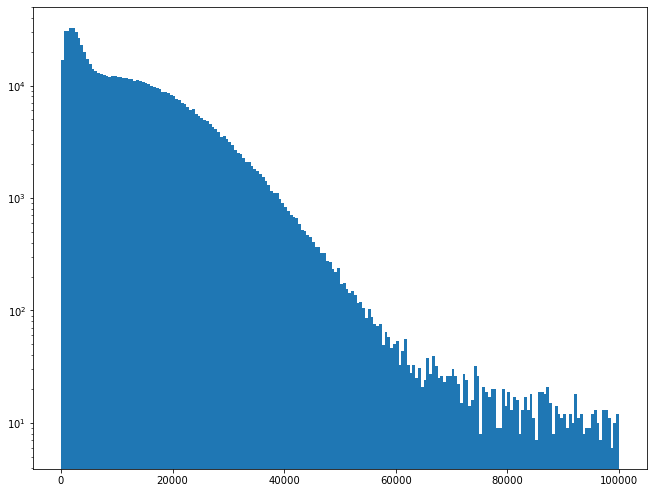

In [161]:
bt=[]
for j in range(len(rns)):
        d = rm_bkg(uv.get_data(rns[j]))
        bt.append(d) 
plt.subplots(figsize=(11,8.5))
bt1=np.array(bt)
bt1f=np.abs(bt1[:,:,800:1200]).flatten()
vro3=bt1f
vro3 = vro3[vro3 < 1e5]
plt.yscale('log')
#plt.hist(bt1f,bins=200);
plt.hist(vro3,bins=200);

In [153]:
bt1[:,:,200:1400].shape

(100, 19, 1200)

## Single antenna pair plots

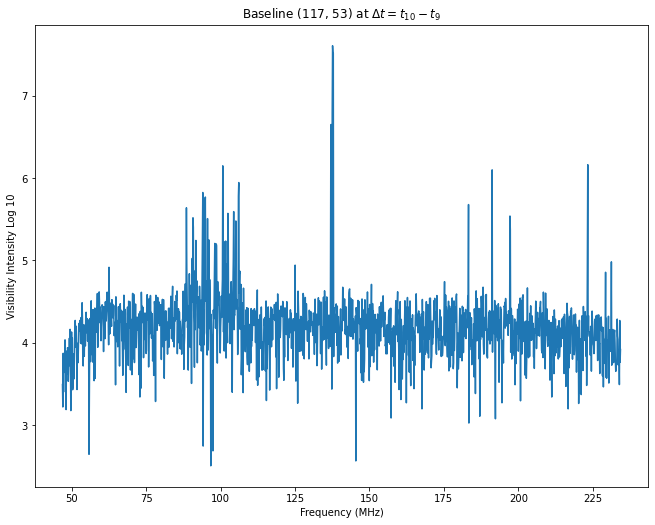

In [128]:
n=9
plt.subplots(figsize=(11,8.5))
plt.plot(freqs,np.log10(np.abs(sr1[n])))
plt.xlabel('Frequency (MHz)')
plt.ylabel('Visibility Intensity Log 10')
plt.title(fr"Baseline {bl1} at $\Delta t = t_{ {n+1} } - t_{ {n} }$",fontsize=12);

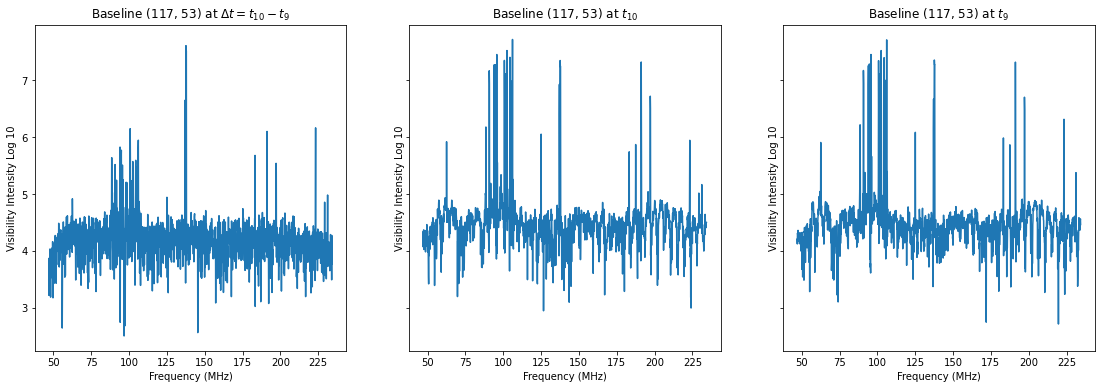

In [144]:
n=9
fig,ax=plt.subplots(1,3,figsize=(19,6),sharey=True)
ax[0].plot(freqs,np.log10(np.abs(sr1[n])))
ax[1].plot(freqs,np.log10(np.abs(d1[n+1])))
ax[2].plot(freqs,np.log10(np.abs(d1[n])))
ax[0].set_xlabel('Frequency (MHz)')
ax[0].set_ylabel('Visibility Intensity Log 10')
ax[1].set_xlabel('Frequency (MHz)')
ax[1].set_ylabel('Visibility Intensity Log 10')
ax[2].set_xlabel('Frequency (MHz)')
ax[2].set_ylabel('Visibility Intensity Log 10')
ax[0].set_title(fr"Baseline {bl1} at $\Delta t = t_{ {n+1} } - t_{ {n} }$",fontsize=12);
ax[1].set_title(fr"Baseline {bl1} at $t_{ {n+1} }$",fontsize=12);
ax[2].set_title(fr"Baseline {bl1} at $t_{ {n} } $",fontsize=12);

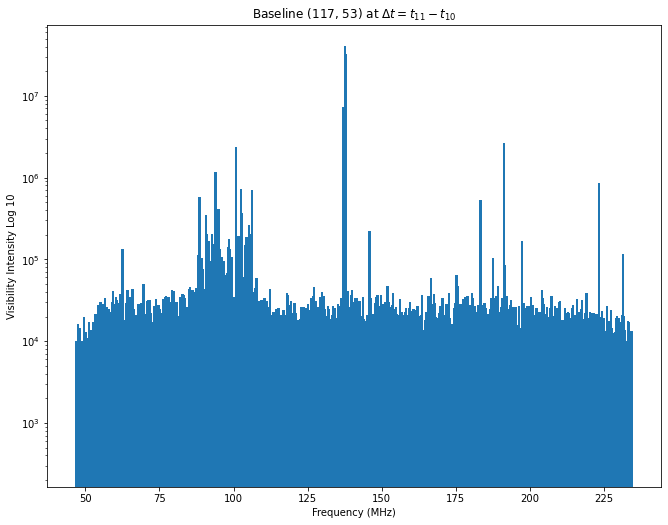

In [58]:
#seems pointless
plt.subplots(figsize=(11,8.5))
plt.yscale('log')
plt.bar(freqs,(np.abs(sr1[n])))
plt.xlabel('Frequency (MHz)')
plt.ylabel('Visibility Intensity Log 10')
plt.title(fr"Baseline {bl1} at $\Delta t = t_{ {n+1} } - t_{ {n} }$",fontsize=12);

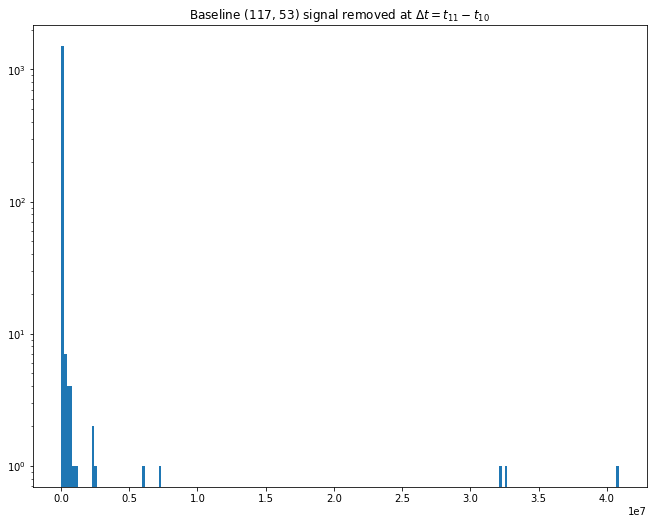

In [120]:
plt.subplots(figsize=(11,8.5))
plt.yscale('log')
plt.hist(np.abs(sr1[n]),bins=200);
plt.title(fr"Baseline {bl1} signal removed at $\Delta t = t_{ {n+1} } - t_{ {n} }$",fontsize=12);

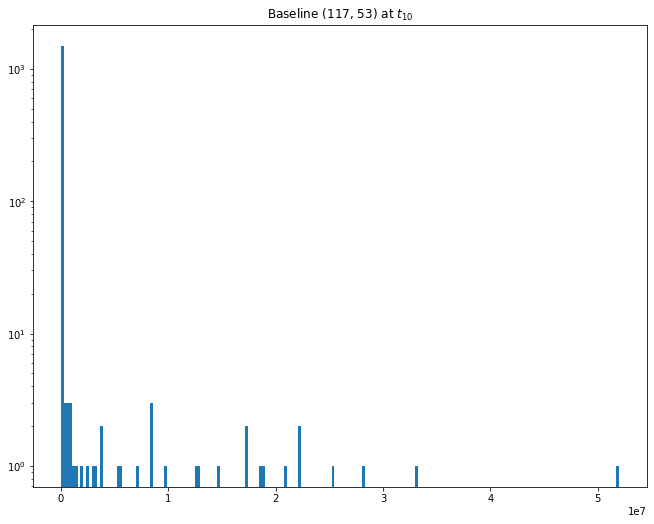

In [122]:
plt.subplots(figsize=(11,8.5))
plt.yscale('log')
plt.hist(np.abs(d1[n]),bins=200);
plt.title(fr"Baseline {bl1} at $t_{ {n} }$",fontsize=12);

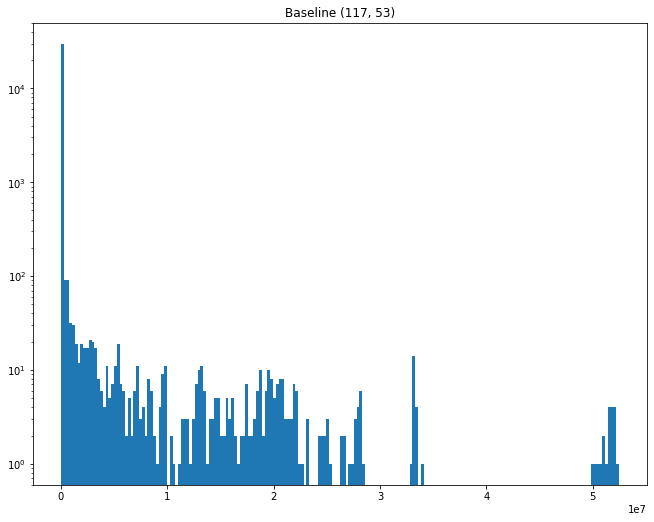

In [124]:
plt.subplots(figsize=(11,8.5))
plt.yscale('log')
plt.hist(np.abs(d1.flatten()),bins=200);
plt.title(fr"Baseline {bl1}",fontsize=12);

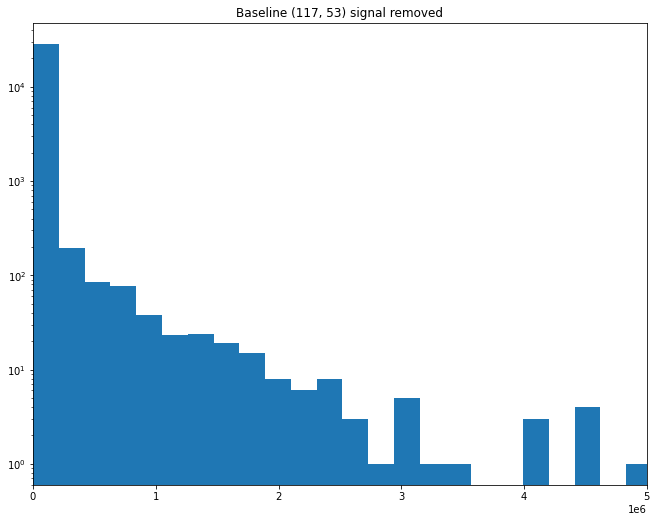

In [63]:
plt.subplots(figsize=(11,8.5))
plt.yscale('log')
en=plt.hist(np.abs(sr1).flatten(),bins=200);
plt.xlim(0,0.5e7)
plt.title(fr"Baseline {bl1} signal removed",fontsize=12);

In [64]:
en[0].max()

28595.0

## Average visibility plots

In [74]:
ns=[]
for i in range(len(p)):
    if p[i][0]!=p[i][1]:
        ns.append(p[i])

In [76]:
len(ns)

630

## Bad Ideas are afoot, DO NOT signal remove OR average the WHOLE $v_{ab}$ baseline set you idiot
I am using a random sample of 100 cross-correlation baselines from the original list of **630** cross-correlation baslines

In [79]:
np.random.seed(420)
ns=[]
for i in range(len(p)):
    if p[i][0]!=p[i][1]:
        ns.append(p[i])
rni= np.random.choice(np.arange(len(ns),dtype=int),size=100,replace=False)
npa=np.array(ns)
rns=npa[rni]

In [166]:
avg1=[]
for i in range(20):
    bt = []
    for j in range(len(rns)):
        d = abs(uv.get_data(rns[j]))
        bt.append(d[i])
    bt = np.array(bt)
    mc=bt.mean(axis=0)
    avg1.append(mc)
avg1=np.array(avg1)
avg1.shape

(20, 1536)

### Signal Removed

In [167]:
avg1sr=[]
for i in range(19):
    bt = []
    for j in range(len(rns)):
        d = abs(rm_bkg(uv.get_data(rns[j])))
        bt.append(d[i])
    bt = np.array(bt)
    mc=bt.mean(axis=0)
    avg1sr.append(mc)
avg1sr=np.array(avg1sr)
avg1sr.shape

(19, 1536)

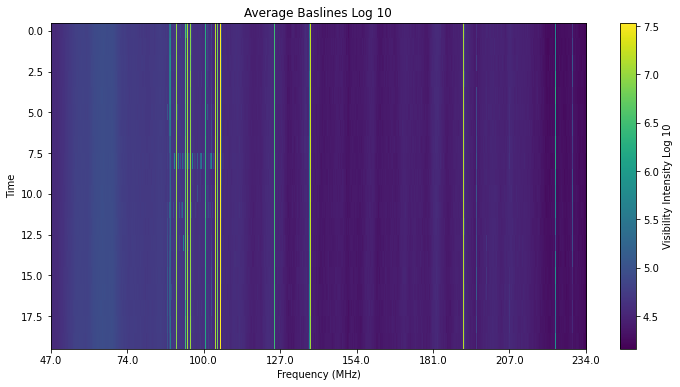

In [168]:
fig, axs = plt.subplots(1,1,figsize=(12,6))
im = plt.imshow(np.log10(np.abs(avg1)),aspect='auto',interpolation='nearest')
cbar = fig.colorbar(im,label='Visibility Intensity Log 10')
freqs = uv.freq_array[0]*1e-6 #gets frequencies associated with each channel, in MHz
axs.set_ylabel('Time')
axs.set_xlabel('Frequency (MHz)')
xticks = [int(i) for i in np.linspace(0,len(freqs)-1,8)]
_ = axs.set_xticks(xticks)
xticklabels = np.around(freqs[xticks],0)
_ = axs.set_xticklabels(xticklabels)
plt.title(f'Average Baslines Log 10')
plt.show()

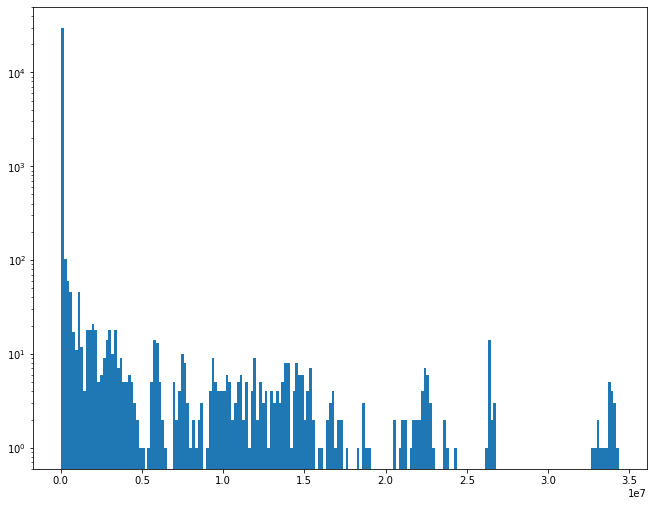

In [169]:
plt.subplots(figsize=(11,8.5))
plt.yscale('log')
plt.hist(avg1.flatten(),bins=200);

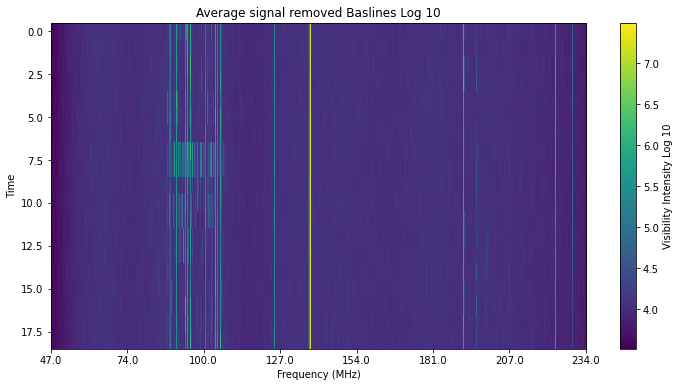

In [170]:
fig, axs = plt.subplots(1,1,figsize=(12,6))
im = plt.imshow(np.log10(np.abs(avg1sr)),aspect='auto',interpolation='nearest')
cbar = fig.colorbar(im,label='Visibility Intensity Log 10')
freqs = uv.freq_array[0]*1e-6 #gets frequencies associated with each channel, in MHz
axs.set_ylabel('Time')
axs.set_xlabel('Frequency (MHz)')
xticks = [int(i) for i in np.linspace(0,len(freqs)-1,8)]
_ = axs.set_xticks(xticks)
xticklabels = np.around(freqs[xticks],0)
_ = axs.set_xticklabels(xticklabels)
plt.title(f'Average signal removed Baslines Log 10')
plt.show()

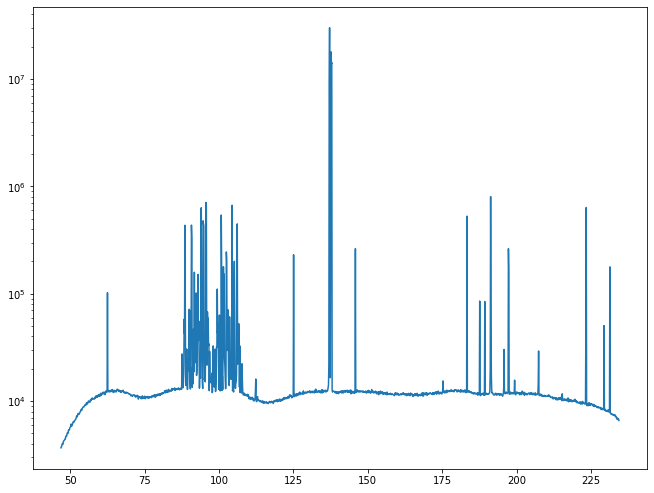

In [174]:
plt.subplots(figsize=(11,8.5))
plt.yscale('log')
plt.plot(freqs,np.abs(np.mean(avg1sr,axis=0)));

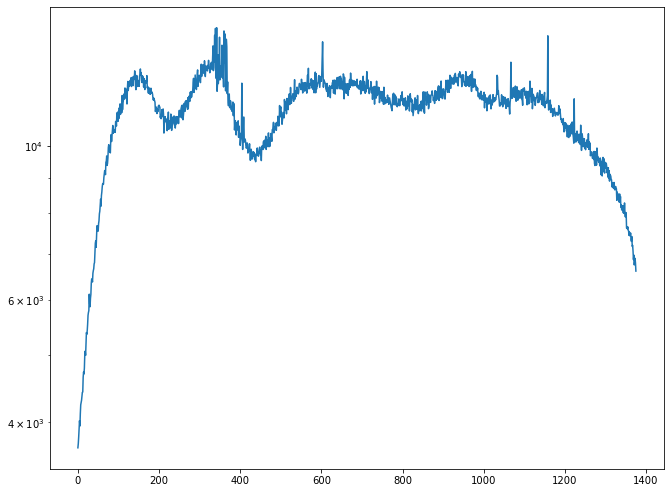

In [308]:
plt.subplots(figsize=(11,8.5))
plt.yscale('log')
hi=np.abs(np.mean(avg1sr,axis=0))
maria1=hi[hi <1.5e4]
plt.plot(np.arange(len(maria1)),maria1);

(825.0, 1025.0)

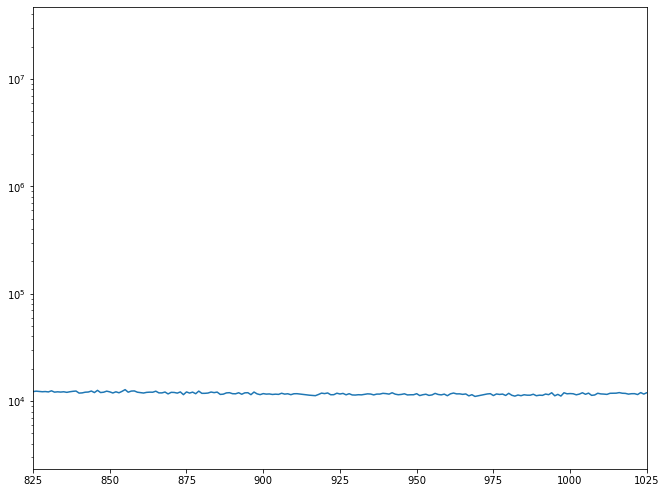

In [216]:
plt.subplots(figsize=(11,8.5))
plt.yscale('log')
plt.plot(np.arange(len(freqs)),np.abs(np.mean(avg1sr,axis=0)));
plt.xlim(825,825+200)

(150.0, 300.0)

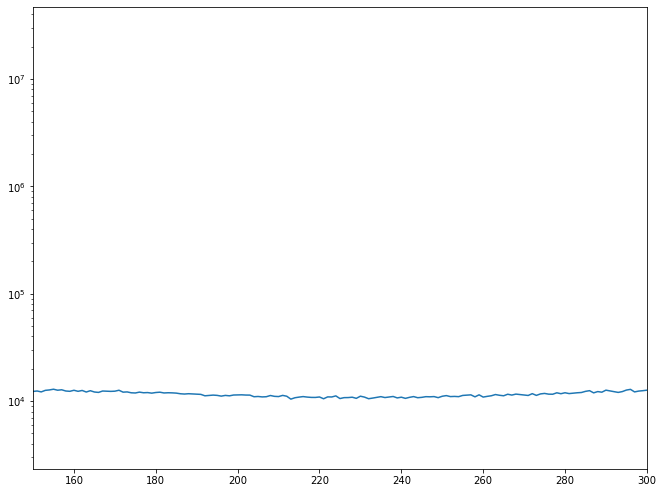

In [246]:
plt.subplots(figsize=(11,8.5))
plt.yscale('log')
plt.plot(np.arange(len(freqs)),np.abs(np.mean(avg1sr,axis=0)));
plt.xlim(150,300)

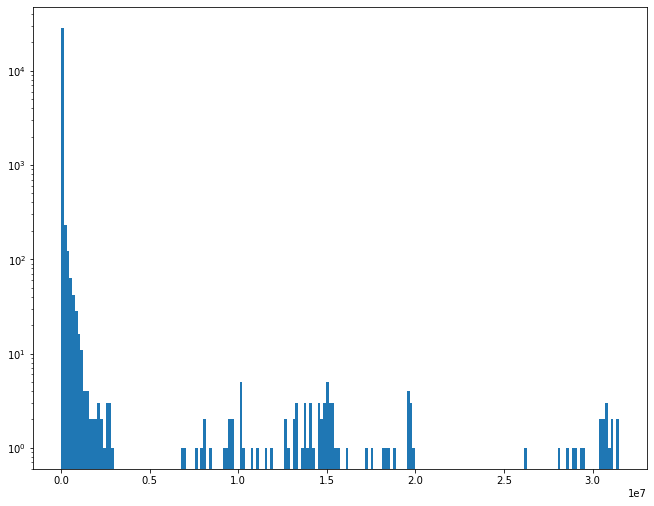

In [175]:
plt.subplots(figsize=(11,8.5))
plt.yscale('log')
n,bins,p=plt.hist(avg1sr.flatten(),bins=200);
#b=bins[:-1]-bins[:1]
#plt.errorbar(b,n,yerr=5,elinewidth=1,linewidth=0)


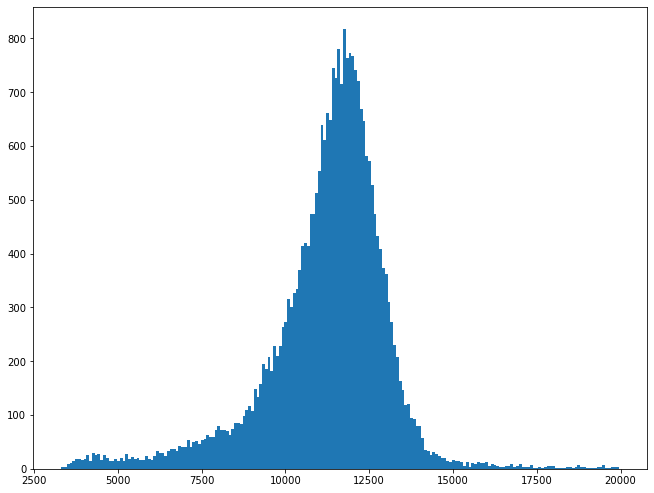

In [299]:
plt.subplots(figsize=(11,8.5))
fl = np.abs(avg1sr.flatten())
vro3 = fl[fl < 2e4]
#plt.yscale('log')
#plt.hist(bt1f,bins=200);
plt.hist(vro3,bins=200);

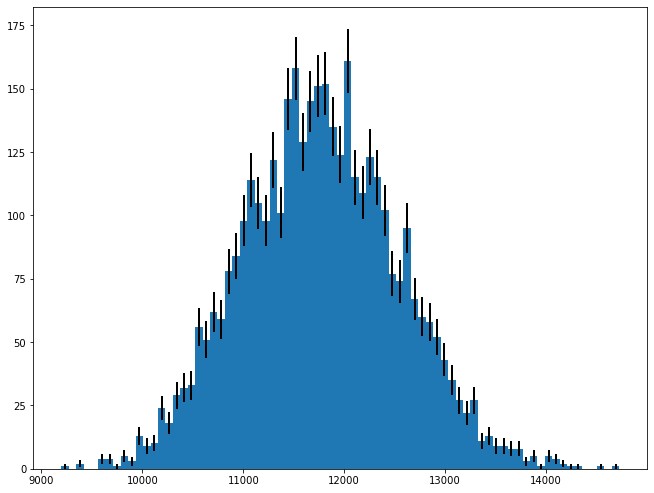

In [290]:
fig,ax=plt.subplots(figsize=(11,8.5))
fl = np.abs((avg1sr[:,825:1025].flatten()))
vro3 = fl#[fl < 8e4]
#plt.yscale('log')
#plt.hist(bt1f,bins=200);
n1,bins,p=plt.hist(vro3,bins=75);
b=bins[:-1]+(bins[1+20]-bins[0+20])/2
plt.errorbar(b,n1,yerr=np.sqrt(n1),elinewidth=2,linewidth=0,color='k');

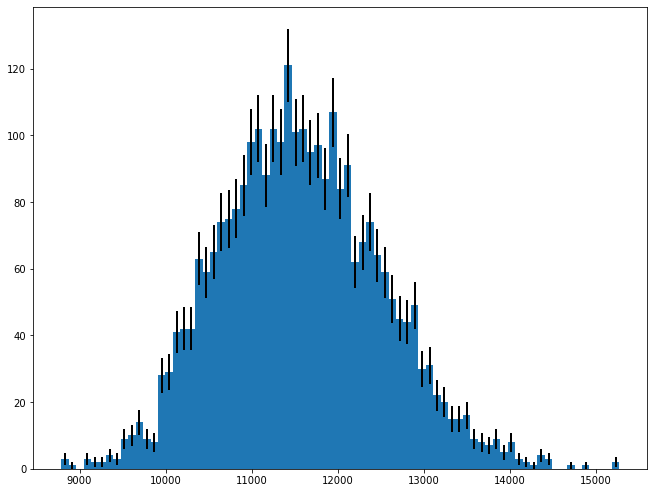

In [291]:
plt.subplots(figsize=(11,8.5))
fl = np.abs(avg1sr[:,150:300].flatten())
vro3 = fl#[fl < n1[1].max()]
#plt.yscale('log')
#plt.hist(bt1f,bins=200);
n2,bins,p=plt.hist(vro3,bins=75);
b=bins[:-1]+(bins[1+20]-bins[0+20])/2
plt.errorbar(b,n2,yerr=np.sqrt(n2),elinewidth=2,linewidth=0,color='k');

<BarContainer object of 75 artists>

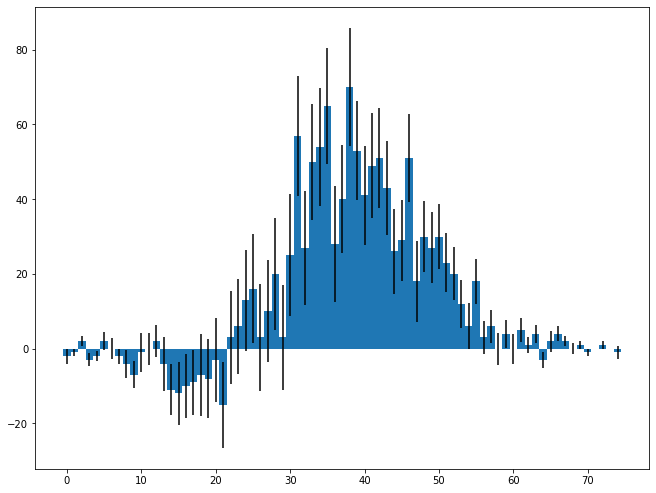

In [295]:
plt.subplots(figsize=(11,8.5))
diff=n1-n2
plt.bar(np.arange(len(diff)),diff,width=1,yerr=np.sqrt(n1+n2))

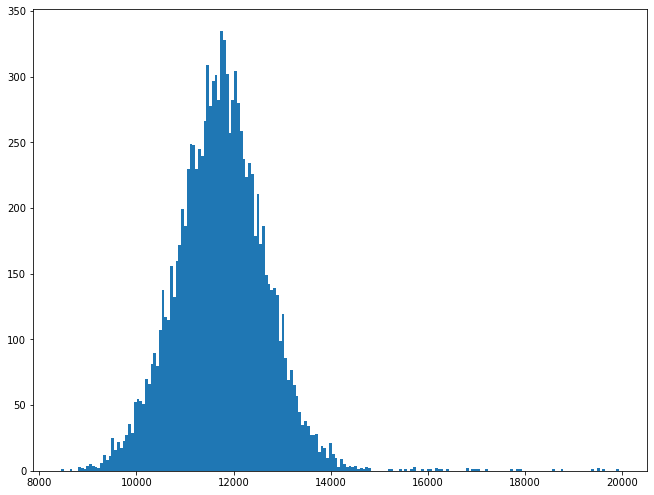

In [305]:
fig,ax=plt.subplots(figsize=(11,8.5))
fl = np.abs((avg1sr[:,800:1400].flatten()))
vro3 = fl[fl < 2e4]
#plt.yscale('log')
#plt.hist(bt1f,bins=200);
n1,bins,p=plt.hist(vro3,bins=200);

In [142]:
n.size

200

In [143]:
bins.size

201

In [146]:
b.size

200

In [150]:
b

array([       0.        ,   157631.32386835,   315262.6477367 ,
         472893.97160505,   630525.2954734 ,   788156.61934175,
         945787.9432101 ,  1103419.26707845,  1261050.5909468 ,
        1418681.91481515,  1576313.2386835 ,  1733944.56255185,
        1891575.8864202 ,  2049207.21028855,  2206838.53415691,
        2364469.85802526,  2522101.18189361,  2679732.50576196,
        2837363.82963031,  2994995.15349866,  3152626.47736701,
        3310257.80123536,  3467889.12510371,  3625520.44897206,
        3783151.77284041,  3940783.09670876,  4098414.42057711,
        4256045.74444546,  4413677.06831381,  4571308.39218216,
        4728939.71605051,  4886571.03991886,  5044202.36378721,
        5201833.68765556,  5359465.01152391,  5517096.33539226,
        5674727.65926061,  5832358.98312896,  5989990.30699731,
        6147621.63086566,  6305252.95473401,  6462884.27860236,
        6620515.60247071,  6778146.92633907,  6935778.25020742,
        7093409.57407577,  7251040.89794